In [12]:
import pandas as pd
import numpy as np
import json
import joblib

import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.base import TransformerMixin, ClassifierMixin, BaseEstimator
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.pipeline import make_pipeline
import pickle
import joblib


In [13]:
df = pd.read_csv('train.csv')

In [14]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df = df.drop(df[(df.InterventionReasonCode == 'no')].index)

In [15]:
df.shape

(2268333, 15)

In [16]:
df.head()

,VehicleSearchedIndicator,ContrabandIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
0,False,False,New Haven,10/01/2013 12:00:00 AM,NEW HAVEN,V,262,True,N,Stop Sign,31.0,H,W,M,True
1,False,False,State Police,10/01/2013 12:00:00 AM,WILLINGTON,V,1000002715,False,N,Other,29.0,M,W,M,False
2,False,False,Plymouth,10/01/2013 12:00:00 AM,Terryville,V,21,True,N,Speed Related,18.0,N,W,M,True
3,False,False,Plymouth,10/01/2013 12:00:00 AM,Plymouth,V,D1,True,N,Speed Related,52.0,N,W,F,False
4,False,False,Bethel,10/01/2013 12:00:00 AM,BETHEL,V,08M,True,N,Cell Phone,34.0,N,W,M,False


In [17]:
class_0, class_1 = df.ContrabandIndicator.value_counts()


df_class_0 = df[df['ContrabandIndicator'] == 0]
df_class_1 = df[df['ContrabandIndicator'] == 1]


df_class_0_under = df_class_0.sample(df_class_1.shape[0]*49,random_state=1)
df_new = pd.concat([df_class_0_under, df_class_1], axis=0)
df_new = df_new.reset_index(drop=True)


In [18]:
X = df_new.drop(columns='ContrabandIndicator')

In [19]:
y = df_new['ContrabandIndicator']

In [20]:
X.head()

,VehicleSearchedIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
0,False,New Canaan,09/01/2014 04:06:00 PM,New Canaan,E,255,True,N,Display of Plates,54.0,N,W,M,True
1,False,Newington,07/24/2014 06:11:00 PM,Newington,V,EAS2608,True,N,Speed Related,41.0,N,W,M,False
2,True,West Hartford,01/04/2016 10:54:40 AM,WEST HARTFORD,V,1000002101,True,C,Moving Violation,60.0,N,B,M,False
3,False,Old Saybrook,12/03/2016 05:00:00 PM,OLD SAYBROOK,E,30,True,N,Defective Lights,46.0,N,W,M,True
4,False,Orange,02/12/2014 07:59:00 PM,Orange,V,MSC9492,True,N,Traffic Control Signal,20.0,N,W,M,False


In [21]:
y

0          False
1          False
2          False
3          False
4          False
           ...  
1282195     True
1282196     True
1282197     True
1282198     True
1282199     True
Name: ContrabandIndicator, Length: 1282200, dtype: bool

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
X_train.head()

,VehicleSearchedIndicator,Department Name,InterventionDateTime,InterventionLocationName,InterventionReasonCode,ReportingOfficerIdentificationID,ResidentIndicator,SearchAuthorizationCode,StatuteReason,SubjectAge,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,TownResidentIndicator
984784,False,CSP Troop H,02/29/2016 05:03:56 PM,ROCKY HILL,V,39333217,False,N,Moving Violation,23.0,N,I,M,False
238490,False,State Police,11/30/2014 10:30:00 PM,WESTPORT,V,1000002702,False,N,Speed Related,18.0,N,W,F,False
660313,False,New Canaan,02/19/2017 09:50:00 AM,New Canaan,V,289,True,N,Speed Related,30.0,N,W,M,False
872193,False,MTA Stamford,11/29/2016 11:10:00 AM,Norwalk,V,2710,True,O,Cell Phone,37.0,H,W,F,True
158802,False,CSP Troop A,10/27/2017 03:39:00 PM,WATERBURY,V,1000003392,True,N,STC Violation,25.0,N,B,M,False


In [24]:
class PreProcess(BaseEstimator, TransformerMixin):
    def fit(self, *_):
        return self
    
    def transform(self, df, *_):
        
        _df = df.copy()
        
        #Drop features
        _df = _df.rename(columns={"Department Name": "DepartmentName"})
        _df = _df[['DepartmentName','InterventionReasonCode', 'ResidentIndicator', 'InterventionDateTime',
                   'SearchAuthorizationCode', 'StatuteReason', 'TownResidentIndicator']]

        #InterventionReasonCode
        _df.InterventionReasonCode = _df.InterventionReasonCode.str.lower().str.strip()    
           
        #SearchAuthorizationCode
        _df.SearchAuthorizationCode = _df.SearchAuthorizationCode.str.lower().str.strip()
        
        #DepartmentName  
        _df = _df.rename(columns={"Department Name": "DepartmentName"})
        _df.DepartmentName = _df.DepartmentName.str.lower().str.strip()
        
        #StatuteReason
        _df.StatuteReason = _df.StatuteReason.str.lower().str.strip()
        
        #Conversion to DateTime type
        _df.InterventionDateTime = pd.to_datetime(_df.InterventionDateTime, format='%m/%d/%Y %I:%M:%S %p')
    
        #Creating time features
        _df = _df.assign(HourDay = _df.InterventionDateTime.dt.hour
                         + _df.InterventionDateTime.dt.minute / 60,
                         DayWeek = _df.InterventionDateTime.dt.dayofweek,
                         Month = _df.InterventionDateTime.dt.month
                        )
        #Drop inital DateTime column
        _df = _df.drop(columns='InterventionDateTime')
        
        return _df

In [25]:
pipeline = make_pipeline(
    PreProcess(),
    BinaryEncoder(),
    MinMaxScaler(),
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))

In [26]:
%%time

pipeline.fit(X_train, y_train)

CPU times: user 5min 30s, sys: 5.63 s, total: 5min 36s
Wall time: 5min 46s


Pipeline(memory=None,
         steps=[('preprocess', PreProcess()),
                ('binaryencoder',
                 BinaryEncoder(cols=None, drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               mapping=None, return_df=True, verbose=0)),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        mi

In [27]:
pred = pipeline.predict_proba(X_test)

In [28]:
y_pred = (pred[:,1] >= 0.55)


print('Precision score:', round(precision_score(y_test,y_pred),2))
print('Accuracy score:', round(accuracy_score(y_test,y_pred),2))
print('Recall score:', round(recall_score(y_test,y_pred),2))

Precision score: 0.71
Accuracy score: 0.98
Recall score: 0.41


### Assessing fairness

In [29]:
X = df_new[['SubjectEthnicityCode', 'SubjectRaceCode', 'SubjectSexCode']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
X_test['y'] = y_test
X_test['y_pred'] = y_pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
def plot_precision(df , protected_class):
    
    TP = df[(df.y_pred == 1) & (df.y == 1)]
    FP = df[(df.y_pred == 1) & (df.y == 0)]

    prec = TP.groupby(TP[protected_class])[protected_class].count()/(FP.groupby(FP[protected_class])[protected_class].count() + TP.groupby(TP[protected_class])[protected_class].count())
    plt.figure(figsize=(15, 5))
    pal = sns.color_palette("Reds_d", len(prec))

    sns.barplot(prec.index, prec.values)


    ax = sns.barplot(prec.index, prec.values, palette=np.array(pal[::-1]))

    ax.set(xlabel=protected_class, ylabel='Precision')
    plt.show()
    print(prec)

In [33]:
X_test.head()

,SubjectEthnicityCode,SubjectRaceCode,SubjectSexCode,y,y_pred
174839,H,W,M,False,False
437892,M,B,F,False,False
1203822,H,W,M,False,False
981233,N,W,F,False,False
1185900,N,W,M,False,False


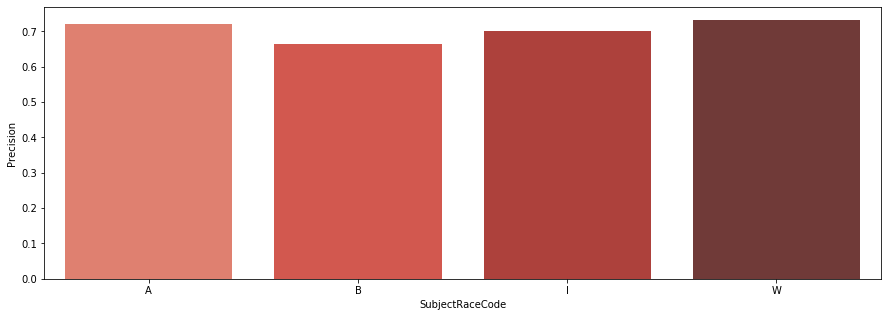

SubjectRaceCode
A    0.720000
B    0.665066
I    0.700000
W    0.732367
Name: SubjectRaceCode, dtype: float64


In [34]:
plot_precision(X_test, 'SubjectRaceCode')

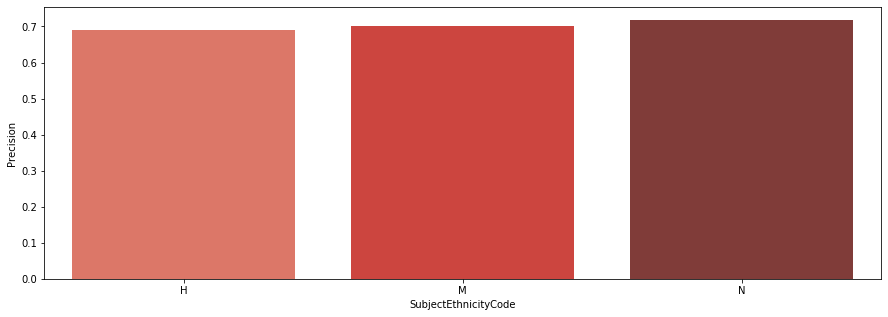

SubjectEthnicityCode
H    0.690385
M    0.700000
N    0.718174
Name: SubjectEthnicityCode, dtype: float64


In [35]:
plot_precision(X_test, 'SubjectEthnicityCode')

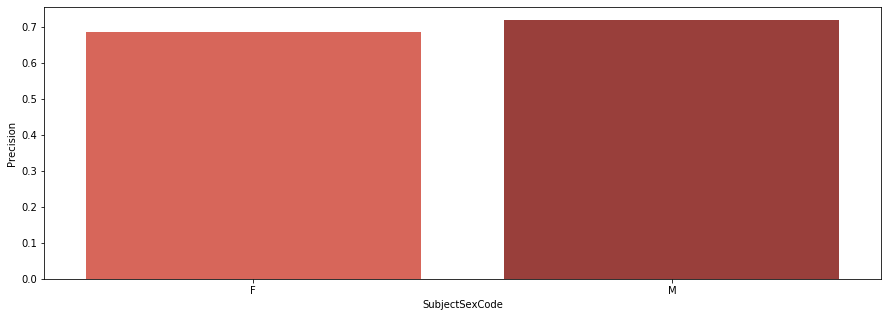

SubjectSexCode
F    0.686703
M    0.719129
Name: SubjectSexCode, dtype: float64


In [36]:
plot_precision(X_test, 'SubjectSexCode')

In [37]:
with open('columns.json', 'w') as fh:
    json.dump(X_train.columns.tolist(), fh)

In [38]:
with open('dtypes.pickle', 'wb') as fh:
    pickle.dump(X_train.dtypes, fh)

In [39]:
joblib.dump(pipeline, 'pipeline.pickle')

['pipeline.pickle']